In [1]:
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
% matplotlib inline 
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8

In [2]:
load_app_config()
DIRECTORY="ex2Data"
file ='age_height.csv'
response="height"
input_path = get_datafolder_path()

{'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
def load_dataset(filename=file,response=response):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = pd.read_csv(input_file)
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
    
    print(response_column)
    print(feature_columns)
    print(input_dataset.describe())
    return continuous_vars ,categorical_vars,response_column,feature_columns,input_dataset
    
    

In [4]:
continuous_vars ,categorical_vars,response_column,feature_columns,input_dataset=load_dataset(file,response)

Continous Variables
Index(['age', 'height'], dtype='object')
No categorical variables
['height']
['age']
             age     height
count  50.000000  50.000000
mean    4.923576   1.064684
std     1.727488   0.119129
min     2.065900   0.779200
25%     3.414550   0.964850
50%     4.832900   1.077200
75%     6.312775   1.144425
max     7.930600   1.303000


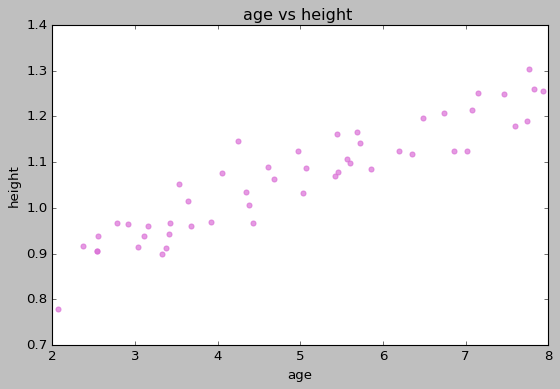

In [5]:
plt.style.use('classic')
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.set_title('age vs height ')
ax.set_xlabel('age')
ax.set_ylabel('height')
ax.set_xlim(2,8)
ax.set_ylim(0.7,1.4)
ax.scatter(input_dataset['age'],input_dataset['height'],marker="o",alpha=0.7,color='orchid')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = input_dataset['age']
y = input_dataset['height']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=35)
X_train, X_test = X_train.values.reshape(-1,1), X_test.values.reshape(-1,1)
y_train, y_test = y_train.values.reshape(-1,1), y_test.values.reshape(-1,1)
print("X-train -{0}".format(X_train.shape))
print("X-train -{0}".format(y_train.shape))
print("X-train -{0}".format(X_test.shape))
print("X-train -{0}".format(y_test.shape))


X-train -(35, 1)
X-train -(35, 1)
X-train -(15, 1)
X-train -(15, 1)


In [7]:
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg)
y_pred = lin_reg.predict(X_test)
print("Linear Intercept :{0}".format(lin_reg.intercept_))
print("Linear Intercept :{0}".format(lin_reg.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Linear Intercept :[ 0.73860378]
Linear Intercept :[[ 0.06542109]]


In [8]:
from sklearn import metrics
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Square Error:0.051192573711885084


In [9]:
from sklearn.linear_model import SGDRegressor 
sgd = SGDRegressor(alpha=0.07,penalty='l2')
sgd.n_iter = np.ceil(10**6/len(y_train))
sgd.fit(X_train, y_train.ravel())
print(sgd)
y_sgdpred = lin_reg.predict(X_test)
print("Linear Intercept :{0}".format(sgd.intercept_))
print("Linear Intercept :{0}".format(sgd.coef_))

SGDRegressor(alpha=0.07, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=28572.0, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
Linear Intercept :[ 0.74485218]
Linear Intercept :[ 0.0641094]


In [10]:
print("Root Mean Square Error -SGD:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_sgdpred))))

Root Mean Square Error -SGD:0.051192573711885084


In [11]:
x_validation=[[3.5],[7]]

In [12]:
y_validation = sgd.predict(x_validation)
print(y_validation)

[ 0.96923507  1.19361797]


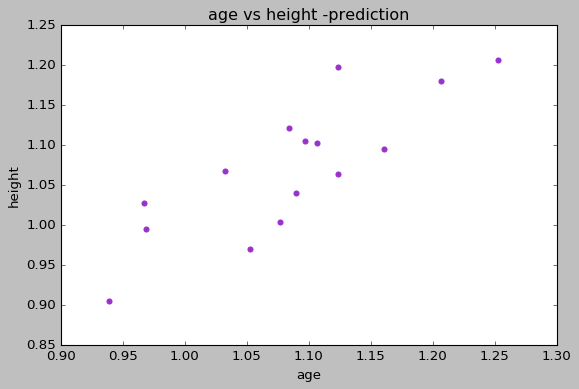

In [13]:
fig2 = plt.figure(figsize=(8,5))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title('age vs height -prediction')
ax2.set_xlabel('age')
ax2.set_ylabel('height')
#ax2.set_xlim(0.85,1.25)
#ax2.set_ylim(0.85,1.25)
ax2.scatter(y_test, y_sgdpred,color='darkorchid')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score
scores = abs(cross_val_score(sgd, X.values.reshape(-1,1), y.values.reshape(-1,1).ravel(), cv=10, scoring='neg_mean_squared_error'))
print(scores)
print(np.sqrt(scores).mean())

[ 0.00292738  0.00065056  0.00292896  0.00475107  0.00144491  0.00194602
  0.00082631  0.00107267  0.00248081  0.00187579]
0.0439400159471
